## **Fonte dos dados** :

[Link Open Data SUS](https://opendatasus.saude.gov.br/organization/ministerio-da-saude)
[sindrome gripal](https://opendatasus.saude.gov.br/dataset/notificacoes-de-sindrome-gripal-leve-2024)

[Relação de Unidades de Saúde que utilizam o ApuraSUS](https://opendatasus.saude.gov.br/dataset/numero-de-unidades-de-saude-usando-o-apurasus-por-tipo-de-estabelecimento)

[Hospitais e leitos](https://opendatasus.saude.gov.br/dataset/hospitais-e-leitos)
[Febre Amarela em humanos e primatas não-humanos](https://opendatasus.saude.gov.br/dataset/febre-amarela-em-humanos-e-primatas-nao-humanos)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sindrome Gripal

In [2]:
df_sindrome_gripal = pd.read_csv('/content/Dados SC - 27-09 - sindrome gripal.csv', sep=';', encoding='utf-8', engine='python', on_bad_lines='skip')
df_sindrome_gripal.head()

,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,Assintomático,Não,Branca,NaN,NaN,Não,NaN,NaN,Masculino,Santa Catarina,...,NaN,NaN,NaN,NaN,NaN,2022-08-24,NaN,NaN,NaN,NaN
1,"Coriza, Tosse, Outros",Não,Branca,DOR NO PEITO,NaN,Não,NaN,NaN,Masculino,Santa Catarina,...,NaN,NaN,NaN,NaN,NaN,2022-05-10,NaN,NaN,NaN,36.0
2,"Coriza, Tosse, Outros",Não,Branca,cansaço,NaN,Não,NaN,NaN,Masculino,Santa Catarina,...,NaN,NaN,NaN,NaN,NaN,2022-03-14,NaN,NaN,NaN,10.0
3,"Coriza, Dor de Cabeça, Febre",Não,Branca,NaN,NaN,Não,NaN,NaN,Masculino,Santa Catarina,...,NaN,NaN,NaN,NaN,NaN,2022-09-01,NaN,NaN,NaN,22.0
4,"Dor de Cabeça, Dor de Garganta, Tosse",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,Santa Catarina,...,NaN,NaN,NaN,NaN,NaN,2022-07-08,NaN,NaN,NaN,19.0


In [3]:
df_sindrome_gripal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422395 entries, 0 to 422394
Data columns (total 64 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   sintomas                           422391 non-null  object 
 1   profissionalSaude                  422392 non-null  object 
 2   racaCor                            422358 non-null  object 
 3   outrosSintomas                     86820 non-null   object 
 4   outrasCondicoes                    13167 non-null   object 
 5   profissionalSeguranca              422194 non-null  object 
 6   cbo                                9586 non-null    object 
 7   condicoes                          38013 non-null   object 
 8   sexo                               422394 non-null  object 
 9   estado                             422395 non-null  object 
 10  estadoIBGE                         415043 non-null  object 
 11  municipio                          4223

In [4]:
colunas_relevantes = [
    'municipio',               # Município do paciente
    'dataNotificacao',         # Data de notificação
    'evolucaoCaso',            # Evolução do caso
    'classificacaoFinal',      # Classificação final do caso
    'sexo',                    # Sexo do paciente
    'idade',                   # Idade do paciente
    'sintomas',                # Sintomas reportados
    'condicoes',               # Condições pré-existentes
    'profissionalSaude'        # Se é profissional da saúde
]
df_filtrado = df_sindrome_gripal[colunas_relevantes]


df_municipio = df_filtrado[df_filtrado['municipio'] == "Araranguá"]
df_municipio.head(10)

,municipio,dataNotificacao,evolucaoCaso,classificacaoFinal,sexo,idade,sintomas,condicoes,profissionalSaude
23796,Araranguá,2022-02-03,Cura,Confirmado Laboratorial,Feminino,51.0,"Tosse, Outros",NaN,Não
26655,Araranguá,2022-12-02,Cura,Confirmado Laboratorial,Feminino,NaN,"Dor de Cabeça, Outros",NaN,Não
89198,Araranguá,2021-04-28,Cura,Descartado,Masculino,17.0,"Tosse, Coriza, Outros, Dor de Cabeça",NaN,Não
118862,Araranguá,2023-12-28,Cura,Confirmado Laboratorial,Masculino,36.0,"Distúrbios Olfativos, Tosse, Dor de Garganta",NaN,Não
118931,Araranguá,2023-12-17,Cura,Confirmado Laboratorial,Feminino,NaN,"Tosse, Febre, Dispneia",NaN,Não
119431,Araranguá,2023-12-19,Cura,Confirmado Laboratorial,Feminino,51.0,"Distúrbios Gustativos, Febre, Dor de Garganta",NaN,Não
119529,Araranguá,2023-12-28,Cura,Confirmado Laboratorial,Feminino,NaN,"Distúrbios Olfativos, Febre, Dispneia",NaN,Não
119563,Araranguá,2023-12-15,Cura,Confirmado Laboratorial,Feminino,36.0,"Dispneia, Dor de Garganta, Febre",NaN,Não
120099,Araranguá,2023-12-23,Cura,Confirmado Laboratorial,Feminino,NaN,"Distúrbios Gustativos, Febre, Dor de Garganta",NaN,Não
120450,Araranguá,2023-12-19,Cura,Confirmado Laboratorial,Feminino,28.0,"Distúrbios Gustativos, Dor de Cabeça, Tosse",NaN,Não


In [5]:
df_municipio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, 23796 to 419483
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   municipio           1528 non-null   object 
 1   dataNotificacao     1528 non-null   object 
 2   evolucaoCaso        883 non-null    object 
 3   classificacaoFinal  1080 non-null   object 
 4   sexo                1528 non-null   object 
 5   idade               1144 non-null   float64
 6   sintomas            1528 non-null   object 
 7   condicoes           53 non-null     object 
 8   profissionalSaude   1528 non-null   object 
dtypes: float64(1), object(8)
memory usage: 151.7+ KB


In [7]:
df_municipio.shape

(1528, 9)

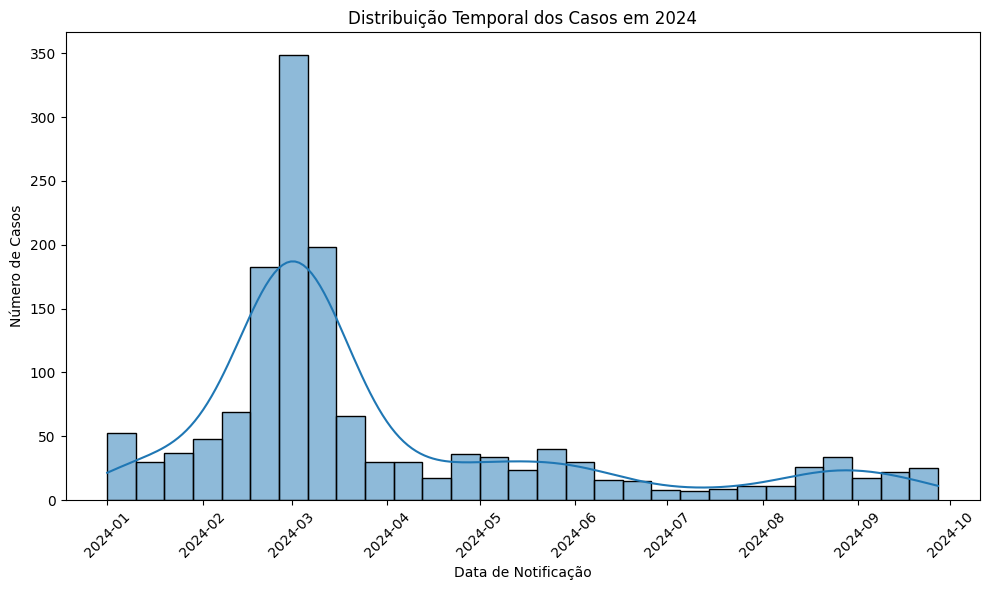

In [8]:
df = df_municipio.copy()
# Converter a coluna 'dataNotificacao' para formato de data
df['dataNotificacao'] = pd.to_datetime(df['dataNotificacao'], errors='coerce')

# Remover registros sem dataNotificacao válida
df_filtered = df.dropna(subset=['dataNotificacao'])

# Filtrar os dados apenas para o ano de 2024
df_filtered_2024 = df_filtered[df_filtered['dataNotificacao'].dt.year == 2024]

# Gráfico mais detalhado para o ano de 2024
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_2024['dataNotificacao'], kde=True) # bins=30
plt.title('Distribuição Temporal dos Casos em 2024')
plt.xlabel('Data de Notificação')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





<ipython-input-9-b59753d588c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sexo', y='idade', data=df, palette='Set2')


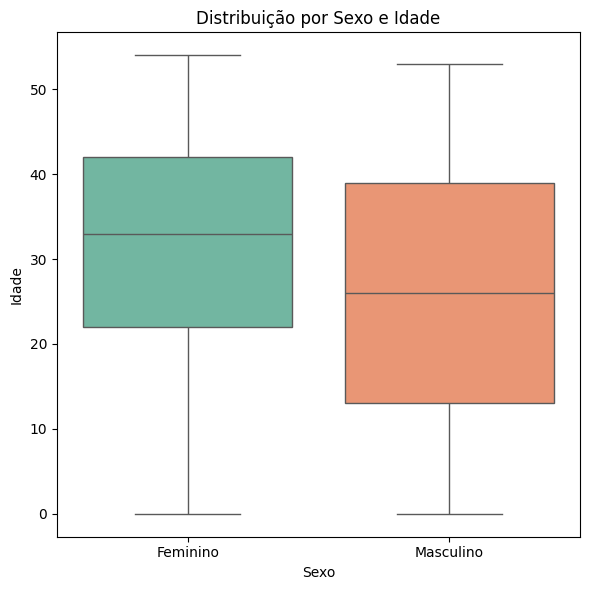

In [9]:
# Gráfico 2: Distribuição por Sexo e Idade
plt.figure(figsize=(6, 6))
sns.boxplot(x='sexo', y='idade', data=df, palette='Set2')
plt.title('Distribuição por Sexo e Idade')
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()



<ipython-input-10-87ed5c6f5556>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='evolucaoCaso', data=df, palette='Set3')


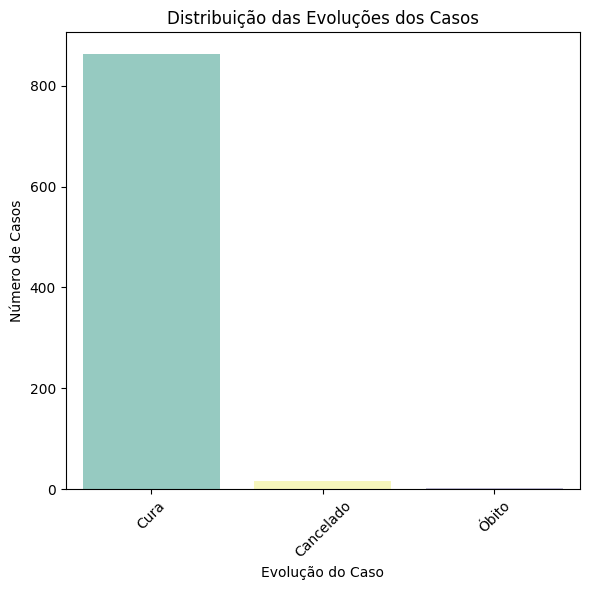

In [10]:
# Gráfico 3: Evolução dos Casos
plt.figure(figsize=(6, 6))
sns.countplot(x='evolucaoCaso', data=df, palette='Set3')
plt.title('Distribuição das Evoluções dos Casos')
plt.xlabel('Evolução do Caso')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df['evolucaoCaso'].value_counts()

,count
evolucaoCaso,
Cura,863
Cancelado,17
Óbito,3


In [12]:
df.to_csv('dados_gripe_aru.csv', index=False)

# Apura SUS

In [ ]:
df_apura_sus = pd.read_csv('/content/Apurasus_Unidades.csv', sep=';', encoding='latin1', engine='python', on_bad_lines='skip')
df_apura_sus.head()

,CNES,UF,UNIDADE DA FEDERAÇÃO,CÓDIGO IBGE,NOME FANTASIA DA UNIDADE,MUNICÍPIO,BAIRRO,LATITUDE,LONGITUDE,Unnamed: 9
0,3794.0,BA,Bahia,292740,INSTITUTO DE PERINATOLOGIA DA BAHIA - IPERBA - GD,Salvador,BROTAS,12.985.343.165.979.300,-3.847.686.767.578.120,NaN
1,2399717.0,PB,Paraíba,250750,HOSP. DE DOENCAS INFECTO CONTAGIOSAS DR CLEMEN...,João Pessoa,JAGUARIBE,-7.115,-34.863,NaN
2,10472.0,DF,Distrito Federal,530010,HRG - HOSPITAL REGIONAL DO GAMA,Gama,GAMA,-16.023.221.098.308.800,-48.069.326.877.593.900,NaN
3,5955688.0,RJ,Rio de Janeiro,330455,UPA 24 HORAS - RICARDO DE ALBUQUERQUE,Rio de Janeiro,RICARDO DE ALBUQUERQ,-22.903,-43.208,NaN
4,2125994.0,MG,Minas Gerais,310670,UBS Wilson Oliveira Antunes (Cachoeira),Betim,CACHOEIRA,-199.580.012,-442.227.776,NaN


In [ ]:
df_apura_sus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CNES                      814 non-null    float64
 1   UF                        814 non-null    object 
 2   UNIDADE DA FEDERAÇÃO      814 non-null    object 
 3   CÓDIGO IBGE               814 non-null    object 
 4   NOME FANTASIA DA UNIDADE  814 non-null    object 
 5   MUNICÍPIO                 814 non-null    object 
 6   BAIRRO                    814 non-null    object 
 7   LATITUDE                  814 non-null    object 
 8   LONGITUDE                 814 non-null    object 
 9   Unnamed: 9                8 non-null      object 
dtypes: float64(1), object(9)
memory usage: 79.7+ KB


In [ ]:
df_municipio = df_apura_sus[df_apura_sus['UNIDADE DA FEDERAÇÃO'] == "Santa Catarina"]

In [ ]:
df_municipio

,CNES,UF,UNIDADE DA FEDERAÇÃO,CÓDIGO IBGE,NOME FANTASIA DA UNIDADE,MUNICÍPIO,BAIRRO,LATITUDE,LONGITUDE,Unnamed: 9
646,2511282.0,SC,Santa Catarina,420910,UBSF RIO BONITO,Joinville,PIRABEIRABA,-261.419.413,-48.901.525.612.648.400,NaN
666,3157245.0,SC,Santa Catarina,420540,EBSERH - HOSPITAL UNIVERSITÁRIO PROFESSOR POLY...,Florianópolis,TRINDADE,-27.597.040.107.119.100,-4.851.781.368.255.610,NaN
672,2511274.0,SC,Santa Catarina,420910,UBSF RIO DA PRATA,Joinville,PIRABEIRABA,-262.113.781,-490.027.164,NaN


# Febre Amarela

In [ ]:
df_febra = pd.read_csv('/content/Febre Amarela em humanos e primatas não-humanos - 1994 a 2023.csv', sep=';', encoding='latin1', engine='python', on_bad_lines='skip')
df_febra.head()

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DT_OBITO
0,1,N,14,RR,140005.0,ALTO ALEGRE,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM,01/12/1994
1,2,N,14,RR,140045.0,PACARAIMA,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO,NaN
2,3,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN,NaN
3,4,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM,09/04/1995
4,5,N,15,PA,150270.0,CONCEIÇÃO DO ARAGUAIA,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM,20/04/1995


In [ ]:
df_febra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2768 non-null   int64  
 1   MACRORREG_LPI     2768 non-null   object 
 2   COD_UF_LPI        2768 non-null   int64  
 3   UF_LPI            2768 non-null   object 
 4   COD_MUN_LPI       2761 non-null   float64
 5   MUN_LPI           2762 non-null   object 
 6   SEXO              2767 non-null   object 
 7   IDADE             2766 non-null   object 
 8   DT_IS             2763 non-null   object 
 9   SE_IS             2752 non-null   float64
 10  MES_IS            2757 non-null   float64
 11  ANO_IS            2768 non-null   int64  
 12  MONITORAMENTO_IS  2768 non-null   object 
 13  OBITO             2768 non-null   object 
 14  DT_OBITO          979 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 324.5+ KB


In [ ]:
df_municipio = df_febra[df_febra['UF_LPI'] == "SC"]
#df_municipio = df_municipio[df_municipio['MUN_LPI'] == "Araranguá"]
#df_municipio.head()
df_municipio['MUN_LPI'].value_counts()

,count
MUN_LPI,
BLUMENAU,8
INDAIAL,4
POMERODE,3
ÁGUAS MORNAS,2
JOINVILLE,1
ITAIÓPOLIS,1
SÃO BENTO DO SUL,1
JARAGUÁ DO SUL,1
CAMBORIÚ,1
